# Import Necessary Libraries

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 52.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=d78bbc0685081ac97ff6bc69ca93f6f0d89ba013cad19cb163244bf2f72a8454
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
!pip install --target=$nb_pat sorted-months-weekdays
!pip install --target=$nb_path sort-dataframeby-monthorweek


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=4db11eb39de082a3f30641d16352fc4471018ce6ba887bfedb974496ee4955f7
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=3323bb4e4ed2490d46941484cfd447e34b402f8b642b853b00bf5803fd1f6bbf
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 125 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.1 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637821 sha256=2e798a65dcdbd903bf3b0e859908253d31be72f24e47ad8cb06caaf8513304b6
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import numpy as np
import pandas as pd
from pyspark import pandas as ps
import pyspark
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pyspark.sql.functions import col, udf,sum, desc,asc,when,regexp_replace 
from pyspark.sql.types import DateType
from geopy.geocoders import Nominatim
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
#import fbprophet 
import tensorflow as tf
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
from pyspark import pandas as ps
import pyspark.sql.functions as f
from geopy.geocoders import Nominatim

plt.style.use('seaborn')

## Creating a spark session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('GS_Sales2').getOrCreate()
spark

## Importing Dataset

In [ ]:
# removed all commas in the dataset
df = spark.read.csv('/content/gdrive/MyDrive/DS DE Internship - GS Sales Data 2022/GS_Sales.csv',inferSchema = True, header=True)
df.show()

+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|
+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|     1|US-2019-103800|  1/3/2019|    2019-1| 1/7/2019|   201

In [ ]:
df.count()

10194

In [ ]:
df.describe().show()

+-------+-----------------+--------------+----------+----------+---------+---------+--------------+-----------+------------------+-----------+--------------+--------+--------------+-----------------+-------+----------------+---------------+----------+------------+--------------------+-----------------+------------------+-------------------+------------------+--------+
|summary|           Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|     Customer Name|    Segment|Country/Region|    City|State/Province|      Postal Code| Region|Regional Manager|     Product ID|  Category|Sub-Category|        Product Name|            Sales|          Quantity|           Discount|            Profit|Returned|
+-------+-----------------+--------------+----------+----------+---------+---------+--------------+-----------+------------------+-----------+--------------+--------+--------------+-----------------+-------+----------------+---------------+----------+-------

# Preprocessing

## Dropping unnecessary variables

In [ ]:
df.filter(col("Returned").contains("#N/A")).count()

9394

In [ ]:
df = df.drop('Row ID','Returned')
df.show()

+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+
|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|
+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+
|US-2019-103800|  1/3/2019|    2019-1| 1/7/2019|   2019-2|Standard Class|   DP-13000|   Darren Powers|   Cons

## Checking for null Values

In [ ]:
from pyspark.sql import functions as F
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+
|Order ID|Order Date|Order_Week|Ship Date|Ship_Week|Ship Mode|Customer ID|Customer Name|Segment|Country/Region|City|State/Province|Postal Code|Region|Regional Manager|Product ID|Category|Sub-Category|Product Name|Sales|Quantity|Discount|Profit|
+--------+----------+----------+---------+---------+---------+-----------+-------------+-------+--------------+----+--------------+-----------+------+----------------+----------+--------+------------+------------+-----+--------+--------+------+
|       0|         0|         0|        0|        0|        0|          0|            0|      0|             0|   0|             0|          0|     0|               0|         0|       0|           0|           0|    0|       0|       0|     0|
+--------+----------

## Handling #N/A values

### Substitute #N/A with suitable data

In [ ]:
pandasDF = df.toPandas()

columns_with_na = []
for columns in pandasDF.columns:
  x = len(pandasDF[pandasDF[columns] == "#N/A"])
  if(x>0):
    columns_with_na.append(columns)

print(columns_with_na)

['Customer Name', 'State/Province', 'Regional Manager', 'Category']


In [ ]:
#Customer Name - Customer ID
# State/Province - Postal Code
#Regional Manager - Region
# Category - NONE

def handleNa(column1, column2):
  Missing_custom_namesId = pandasDF[pandasDF[column1] == "#N/A"][column2].values
  for i in range(len(Missing_custom_namesId)):
    x = pandasDF[pandasDF[column2]==Missing_custom_namesId[i]][column1].reset_index(drop=True)[0]
    pandasDF[column1] = np.where(pandasDF[column2] == Missing_custom_namesId[i],x , pandasDF[column1] )
  
handleNa(column1='Customer Name',column2='Customer ID')
handleNa('State/Province' ,'Postal Code')
handleNa('Regional Manager', 'Region')

df=spark.createDataFrame(pandasDF) 

### Removing #NA Values in category
(since there is no any way to replace missing category values)

In [ ]:
for variable in df.columns:
  x = df.filter(col(variable).contains("#N/A")).count()
  if(x>0):
    df = df.filter(df[variable] !="#N/A")


for variable in df.columns:
  print(variable,df.filter(col(variable).contains("#N/A")).count())

Order ID 0
Order Date 0
Order_Week 0
Ship Date 0
Ship_Week 0
Ship Mode 0
Customer ID 0
Customer Name 0
Segment 0
Country/Region 0
City 0
State/Province 0
Postal Code 0
Region 0
Regional Manager 0
Product ID 0
Category 0
Sub-Category 0
Product Name 0
Sales 0
Quantity 0
Discount 0
Profit 0


In [ ]:
df.count()

10170

## Converting Variables to correct datatype

In [ ]:
func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
df = df.withColumn('Order_Date', func(col("Order Date")))
df = df.withColumn('Ship_Date', func(col("Ship Date")))
df = df.drop("Order Date","Ship Date")
df.show(5)

df.printSchema()

+--------------+----------+---------+--------------+-----------+-------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+----------+----------+
|      Order ID|Order_Week|Ship_Week|     Ship Mode|Customer ID|Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Order_Date| Ship_Date|
+--------------+----------+---------+--------------+-----------+-------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+----------+----------+
|US-2019-103800|    2019-1|   2019-2|Standard Class|   DP-13000|Darren Powers|   Consumer| United States|     Houst

# Exploratory Data Analysis

## EDA on Location

In [ ]:
nominatim = Nominatim(user_agent="my_app")


@f.udf(returnType='STRUCT<`Latitude`: double,`Longitude`: double>')#`Longitude`: double
def cordinates(city):
    location = nominatim.geocode(query={'city': city}, timeout=60)
    if location is None:
        return {'Latitude': None, 'Longitude': None}
    else:
        return {'Latitude': location.latitude, 'Longitude': location.longitude}


geo_df = (df
              .select('City')
              .distinct()
              .withColumn('Cordinates', cordinates('City')))



new_df = df.join(geo_df, on=['City'], how='inner')

new_df = new_df.select('City', 'Cordinates','Sales','Profit','Quantity')
geo_df2 = new_df.groupBy('Cordinates').sum()
geo_df = geo_df2.toPandas()

geo_df[['lat','long']] = pd.DataFrame(geo_df.Cordinates.tolist(), index= geo_df.index)

import plotly.express as px
fig = px.density_mapbox(geo_df, lat='lat', lon='long', z='sum(Sales)', radius=10,
                        center=dict(lat=38, lon=-90), zoom=2.9,
                        mapbox_style="stamen-toner")
fig.show()

In [ ]:
pandasDF = df.toPandas()

### Grouped by region and category 

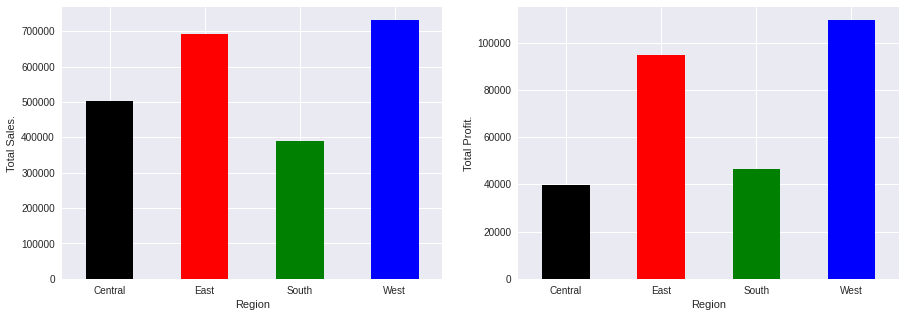

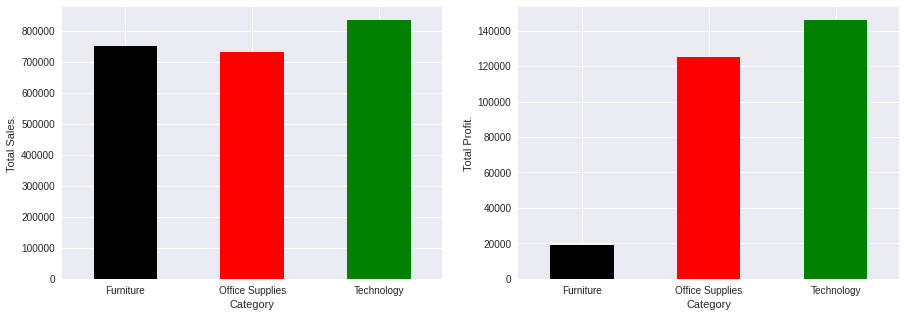

In [ ]:
Categorical_Variables = ['Sales','Profit']
def plot_variable(Grouping_Variable):
  plt.figure(figsize=(15,5))
  a = 1
  b = 2
  c = 1

  for feature in Categorical_Variables:
      plt.subplot(a,b,c)
      pandasDF.groupby(Grouping_Variable)[feature].sum().plot.bar(color=['black', 'red', 'green', 'blue'])
      plt.ylabel(f"Total {feature}.")
      plt.xlabel(Grouping_Variable)
      plt.xticks(rotation=0)
      c=c+1
      
  return plt.show()

plot_variable('Region')
plot_variable('Category')

**When we look at the region, the south and east produce the most sales and profit, while the south produces the least.
When we look at the different product categories, technology-related items tend to sell more and generate more revenue and profit. Although furniture has a higher sales yield, the profit seems relatively small**

### Region with the highest number of customers

Text(0, 0.5, 'Total number of customers')

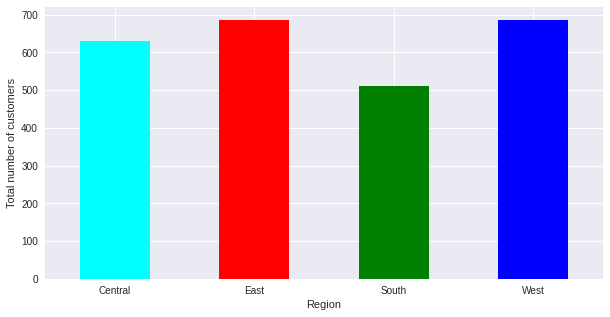

In [ ]:
plt.figure(figsize=(10,5))
pandasDF.groupby('Region')['Customer ID'].nunique().plot.bar(color=['cyan', 'red', 'green', 'blue'])
plt.xticks(rotation=0)
plt.xlabel('Region')
plt.ylabel('Total number of customers')

**Most of the customers are in east and west region of the country and it's followed by centaral and south regions.**

## Grouped by date

In [ ]:
dateGrouped = pandasDF.groupby('Order_Date',as_index = False)['Sales','Profit','Quantity'].sum()
dateGrouped["Order_Date"] = pd.to_datetime(dateGrouped["Order_Date"],infer_datetime_format=True )
dateGrouped['month_year'] = dateGrouped['Order_Date'].dt.to_period('M')
dateGrouped['year'] = dateGrouped['Order_Date'].dt.year
dateGrouped['month'] = dateGrouped['Order_Date'].dt.month_name()

dateGrouped.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Order_Date,Sales,Profit,Quantity,month_year,year,month
0,2019-01-03,16.448,5.5512,2,2019-01,2019,January
1,2019-01-04,288.060,-65.9901,8,2019-01,2019,January
2,2019-01-05,19.536,4.8840,3,2019-01,2019,January
3,2019-01-06,4407.100,1358.0524,30,2019-01,2019,January
4,2019-01-07,87.158,-71.9621,10,2019-01,2019,January


## Graph of Year vs Sales 

Text(0, 0.5, 'Sales')

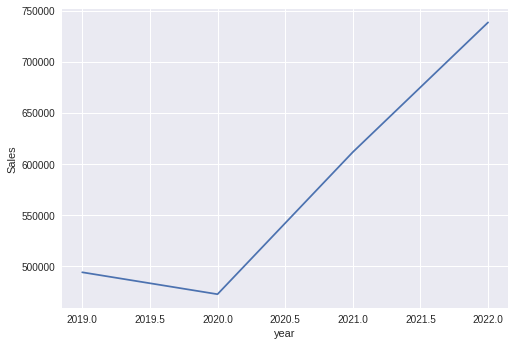

In [ ]:
dateGrouped.groupby('year')['Sales'].sum().plot()
plt.ylabel('Sales')

**Between 2019 and 2020, sales are seen to be declining, but beginning in 2020, sales start to rise steadily.**

### Comparing How monthly sales, Profit and quantity shipped varying each year.

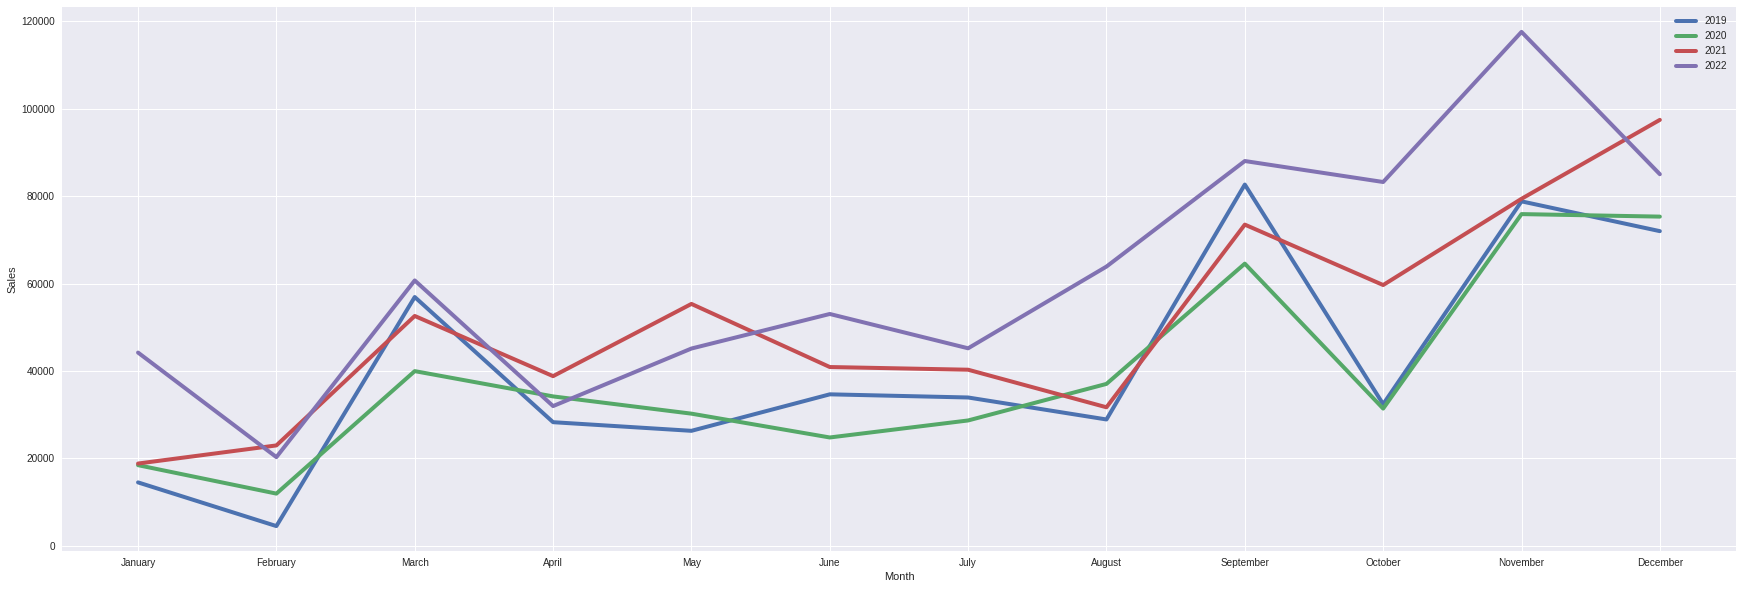

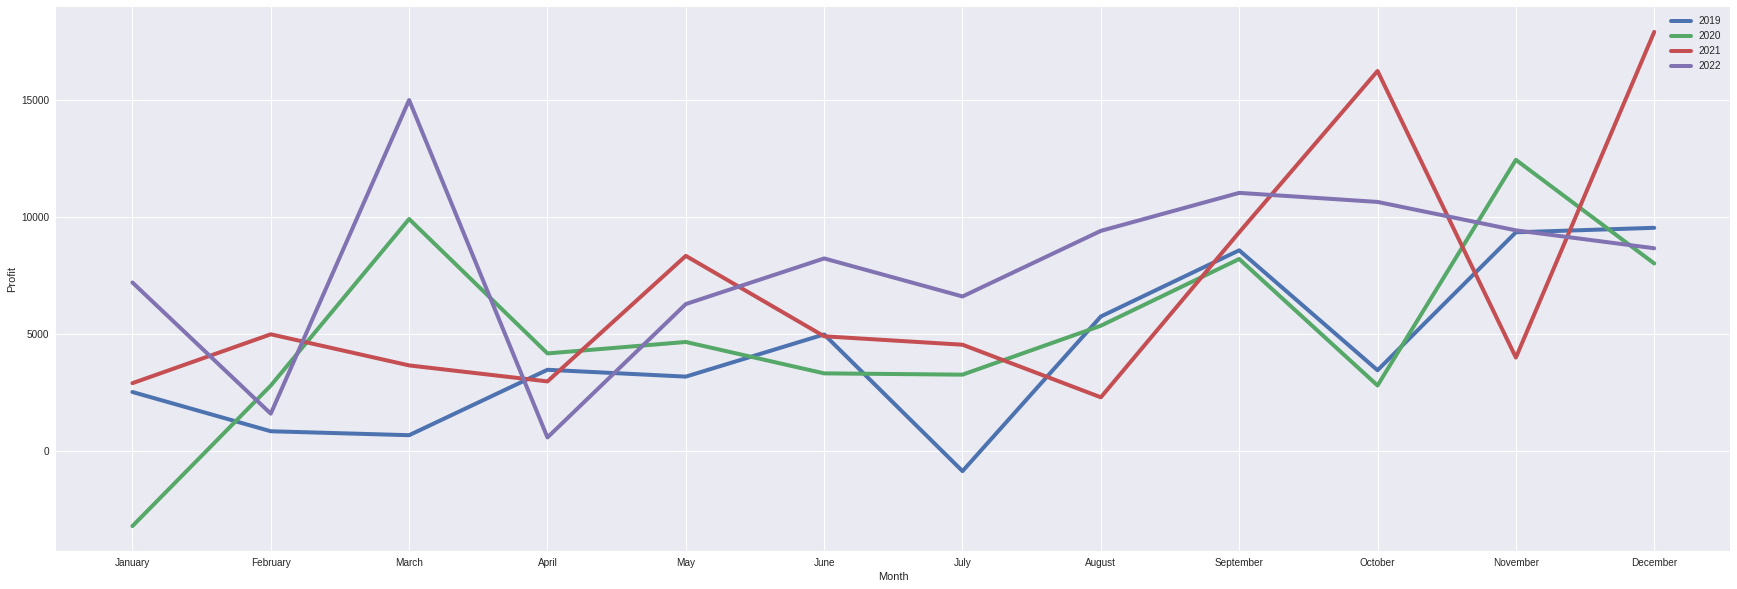

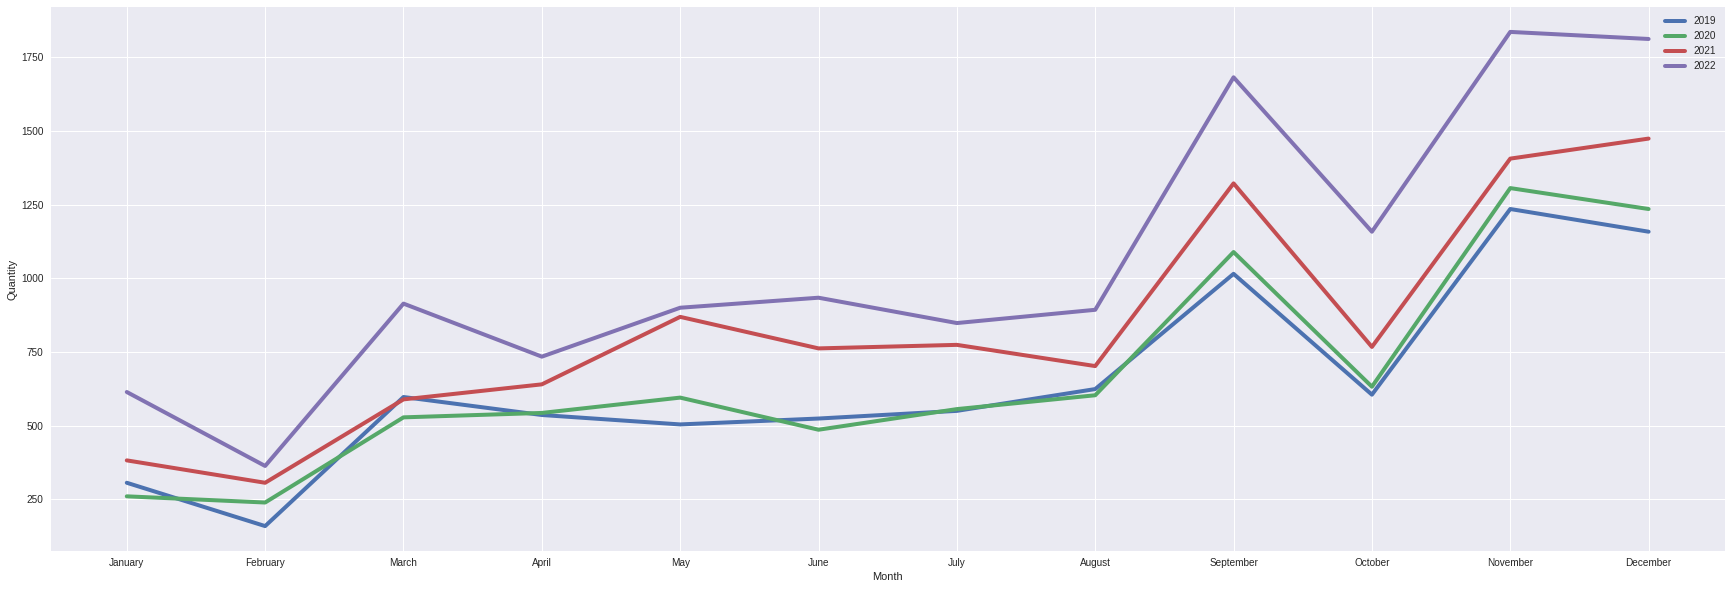

In [ ]:
df_2019 = dateGrouped[dateGrouped['year']==2019][['month','Sales','Profit','Quantity']]
df_2019 = df_2019.groupby('month').agg({"Sales" : "sum","Profit": "sum","Quantity":"sum"}).reset_index().rename(columns={'sales':'s13'})
df_2019= Sort_Dataframeby_Month(df=df_2019,monthcolumnname='month')
df_2020 = dateGrouped[dateGrouped['year']==2020][['month','Sales','Profit','Quantity']]
df_2020 = df_2020.groupby('month').agg({"Sales" : "sum","Profit": "sum","Quantity":"sum"}).reset_index().rename(columns={'sales':'s13'})
df_2020= Sort_Dataframeby_Month(df=df_2020,monthcolumnname='month')
df_2021 = dateGrouped[dateGrouped['year']==2021][['month','Sales','Profit','Quantity']]
df_2021 = df_2021.groupby('month').agg({"Sales" : "sum","Profit": "sum","Quantity":"sum"}).reset_index().rename(columns={'sales':'s13'})
df_2021= Sort_Dataframeby_Month(df=df_2021,monthcolumnname='month')
df_2022 = dateGrouped[dateGrouped['year']==2022][['month','Sales','Profit','Quantity']]
df_2022 = df_2022.groupby('month').agg({"Sales" : "sum","Profit": "sum","Quantity":"sum"}).reset_index().rename(columns={'sales':'s13'})
df_2022= Sort_Dataframeby_Month(df=df_2022,monthcolumnname='month')

plt.figure(figsize=(30,10))
plt.plot(df_2019.month, df_2019.Sales,label = '2019', linewidth=4)
plt.plot(df_2020.month, df_2020.Sales, label = '2020',linewidth=4)
plt.plot(df_2021.month, df_2021.Sales,label = '2021',linewidth=4)
plt.plot(df_2022.month, df_2022.Sales, label = '2022', linewidth=4)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(df_2019.month, df_2019.Profit,label = '2019', linewidth=4)
plt.plot(df_2020.month, df_2020.Profit, label = '2020',linewidth=4)
plt.plot(df_2021.month, df_2021.Profit,label = '2021',linewidth=4)
plt.plot(df_2022.month, df_2022.Profit, label = '2022', linewidth=4)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(df_2019.month, df_2019.Quantity,label = '2019', linewidth=4)
plt.plot(df_2020.month, df_2020.Quantity, label = '2020',linewidth=4)
plt.plot(df_2021.month, df_2021.Quantity,label = '2021',linewidth=4)
plt.plot(df_2022.month, df_2022.Quantity, label = '2022', linewidth=4)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


**The sales from January to December show a definite upward trend. Each year, sales peak in March. There are ups and downs in the sales, but they again peak in September and continue to rise until December. <br><br>
If we look at the quantity, we can clearly see that the monthly shipments are trending up. Every year, December is the month with the most quantities shipped. Every year march and september shipments peak.**

In [ ]:
dateGrouped['date'] = pd.to_datetime(dateGrouped['Order_Date']) - pd.to_timedelta(7, unit='d')
weekGrouped = dateGrouped.groupby([pd.Grouper(key='Order_Date', freq='W')])['Sales'	,'Profit'].sum()
weekGrouped = weekGrouped.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


### Dickey-Fuller test to check if a dataset is stationary



In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_sales = adfuller(list(dateGrouped.Sales))

print("sales results:")

print("ADF = " + str(adf_test_sales[0]))

print("p-value = " +str(adf_test_sales[1]))

sales results:
ADF = -5.777226038022487
p-value = 5.225280768902786e-07


On sales, the p-value, indicating a **non-significant** confidence that the data would be stationary.

### Trends

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


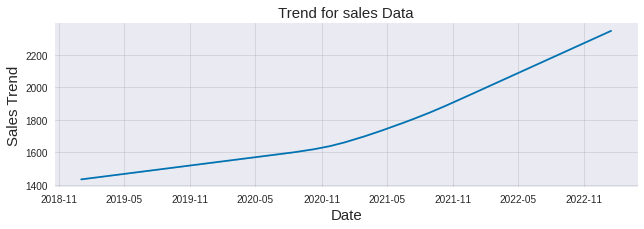

In [ ]:
from fbprophet import Prophet


m = Prophet()

dateGrouped["Order_Date"] = pd.to_datetime(dateGrouped["Order_Date"])
ds = dateGrouped["Order_Date"].dt.tz_localize(None)
y = dateGrouped["Sales"]
df_for_prophet = pd.DataFrame(dict(ds=ds,y=y))
m.fit(df_for_prophet)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]
trend_ax.plot()
plt.title("Trend for sales Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sales Trend", fontsize=15)

plt.show()

### line plot of Daily Sales



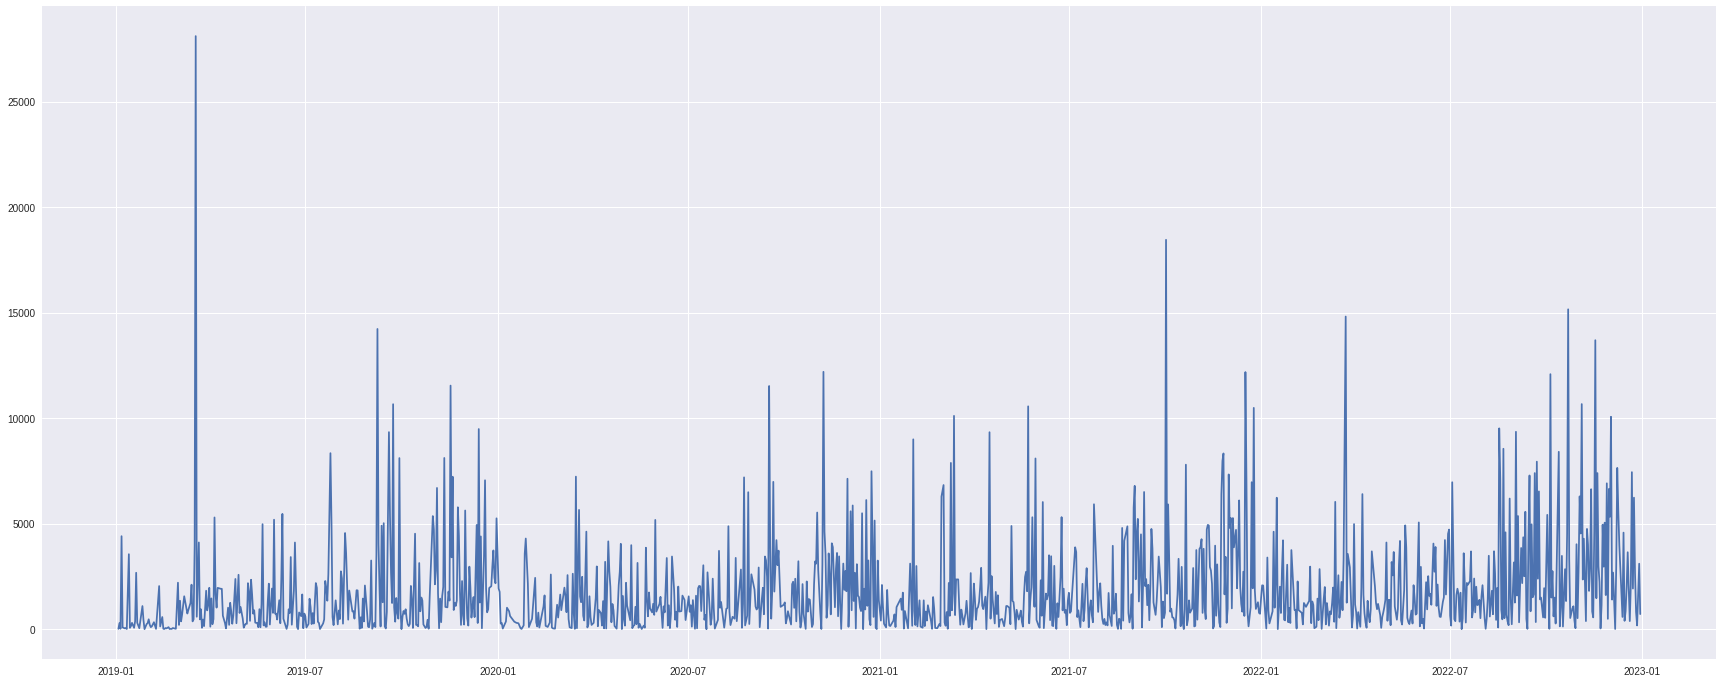

In [ ]:
plt.figure(figsize=(30,12))
plt.plot(dateGrouped.Order_Date, dateGrouped.Sales)

### line plot of Daily Profit

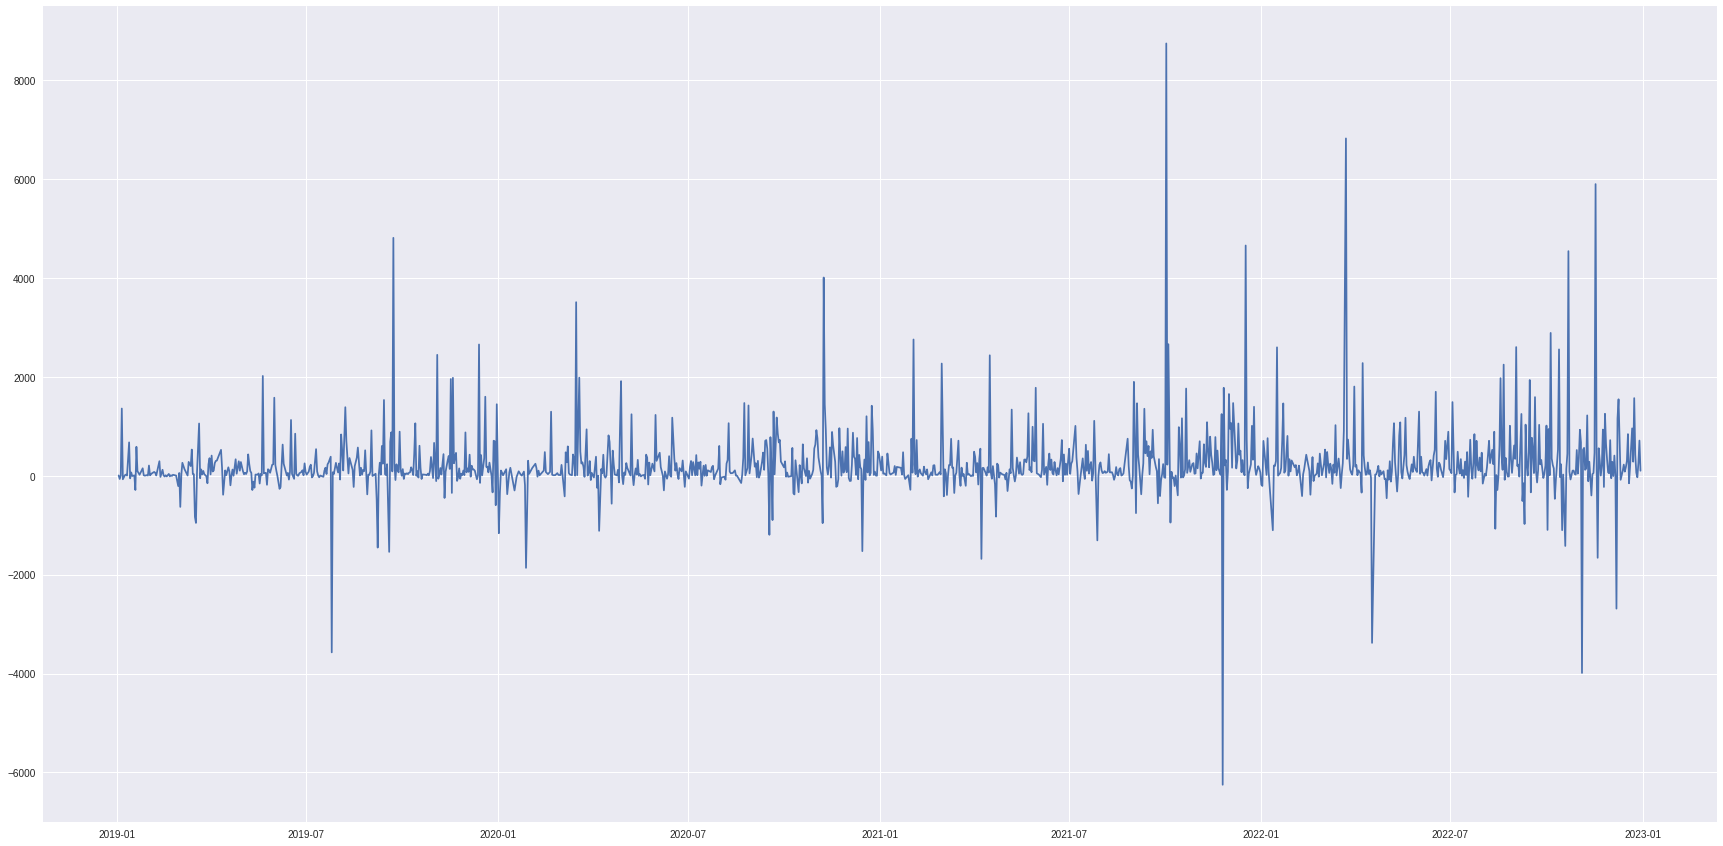

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(dateGrouped.Order_Date, dateGrouped.Profit)

### Group by week

In [ ]:
dateGrouped['date'] = pd.to_datetime(dateGrouped['Order_Date']) - pd.to_timedelta(7, unit='d')
weekGrouped = dateGrouped.groupby([pd.Grouper(key='Order_Date', freq='W')])['Sales'	,'Profit','Quantity'].sum()
weekGrouped = weekGrouped.reset_index()
weekGrouped['year'] = weekGrouped['Order_Date'].dt.year
#weekGrouped['month'] = weekGrouped['Order_Date'].dt.month_name()
weekGrouped.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Order_Date,Sales,Profit,Quantity,year
0,2019-01-06,4731.144,1302.4975,43,2019
1,2019-01-13,3746.267,638.3296,67,2019
2,2019-01-20,3629.202,309.6172,109,2019
3,2019-01-27,1876.348,272.5509,80,2019
4,2019-02-03,1312.752,261.4254,30,2019


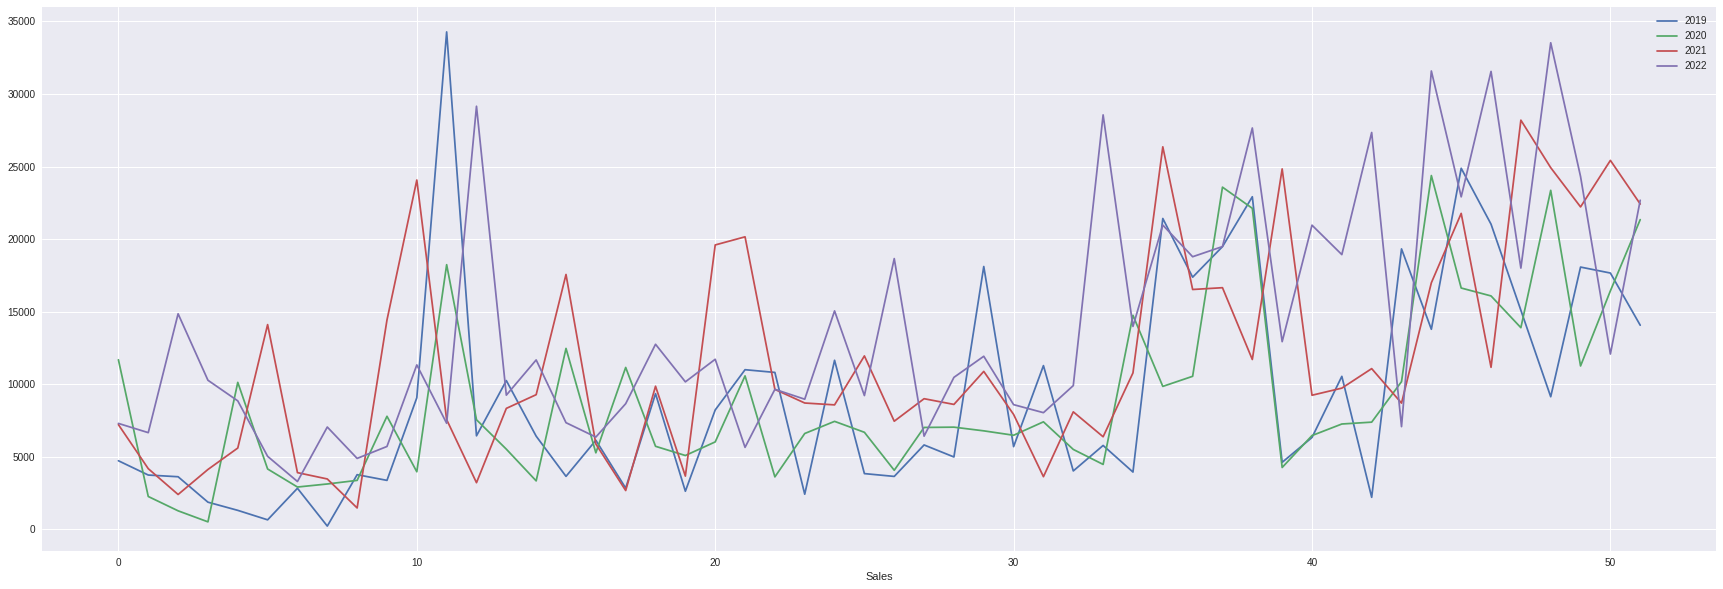

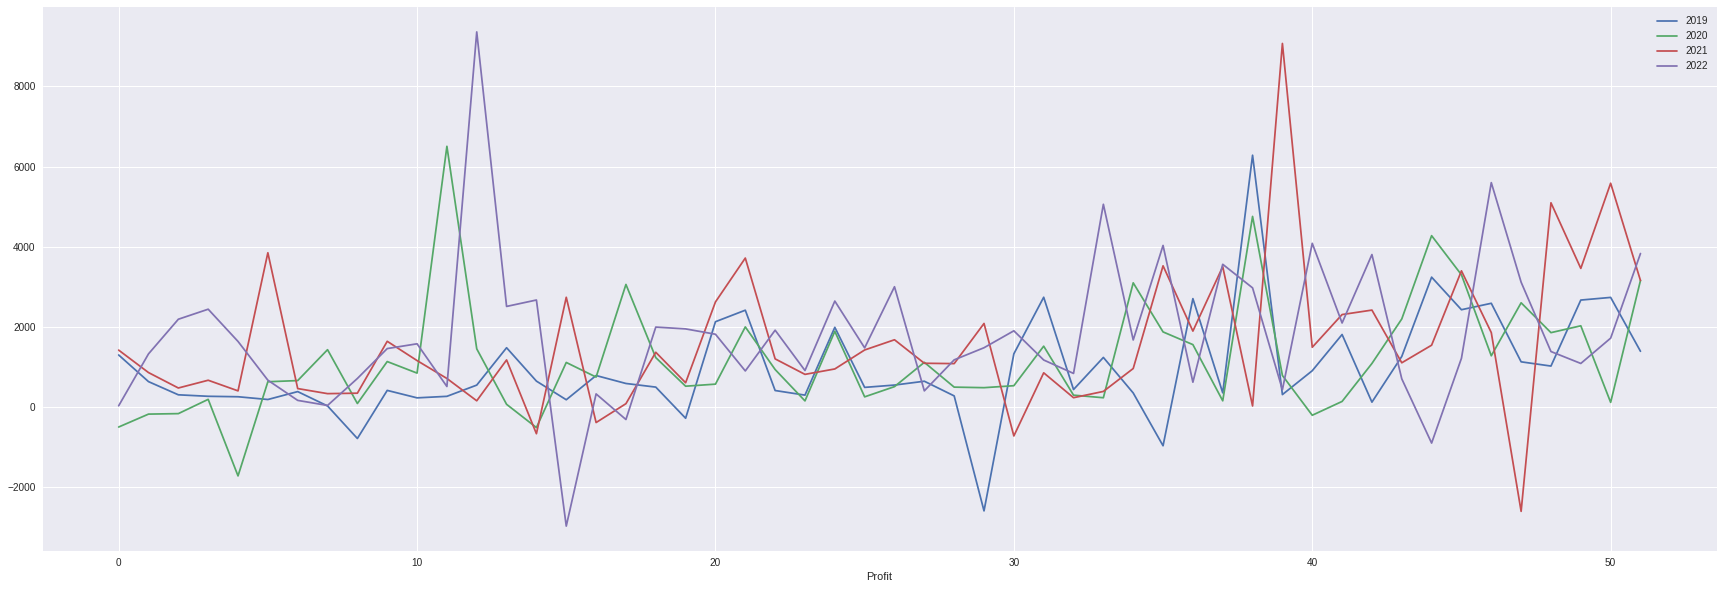

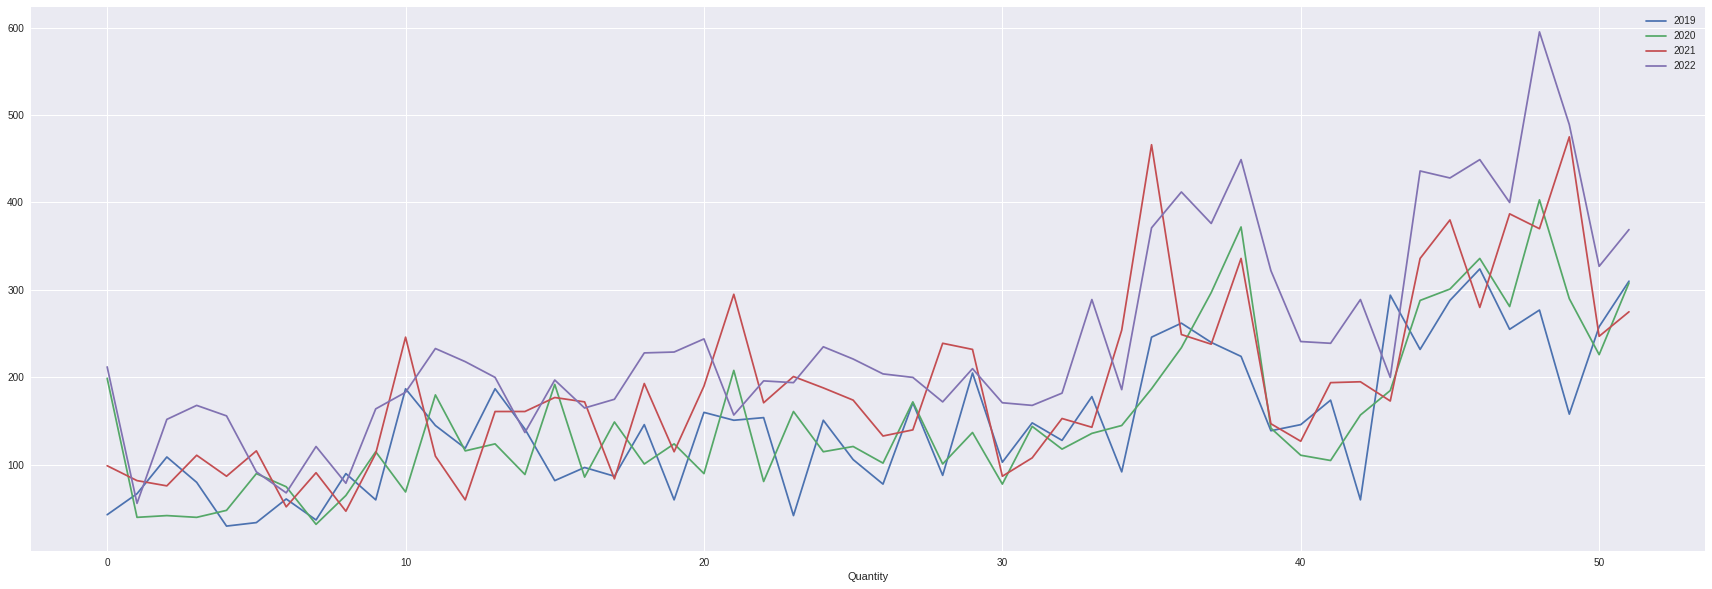

In [ ]:
df_2019 = weekGrouped[weekGrouped['year']==2019][['Order_Date','Sales','Profit','Quantity']].reset_index()
df_2020 = weekGrouped[weekGrouped['year']==2020][['Order_Date','Sales','Profit','Quantity']].reset_index()
df_2021 = weekGrouped[weekGrouped['year']==2021][['Order_Date','Sales','Profit','Quantity']].reset_index()
df_2022 = weekGrouped[weekGrouped['year']==2022][['Order_Date','Sales','Profit','Quantity']].reset_index()

plt.figure(figsize=(30,10))
plt.plot(df_2019.index, df_2019.Sales,label = '2019')
plt.plot(df_2020.index, df_2020.Sales, label = '2020')
plt.plot(df_2021.index, df_2021.Sales,label = '2021')
plt.plot(df_2022.index, df_2022.Sales, label = '2022')
plt.legend()
plt.xlabel('Sales')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(df_2019.index, df_2019.Profit,label = '2019')
plt.plot(df_2020.index, df_2020.Profit, label = '2020')
plt.plot(df_2021.index, df_2021.Profit,label = '2021')
plt.plot(df_2022.index, df_2022.Profit, label = '2022')
plt.legend()
plt.xlabel('Profit')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(df_2019.index, df_2019.Quantity,label = '2019')
plt.plot(df_2020.index, df_2020.Quantity, label = '2020')
plt.plot(df_2021.index, df_2021.Quantity,label = '2021')
plt.plot(df_2022.index, df_2022.Quantity, label = '2022')
plt.legend()
plt.xlabel('Quantity')
plt.show()

**The first two graphs hardly reveal any trends, but the quantity graph reveals that the quantity shipped initially appears to be fairly low and steadily rises over the course of the year. The volume of shipments peaks at the end of the year.**

### line plot of Weekly Sales

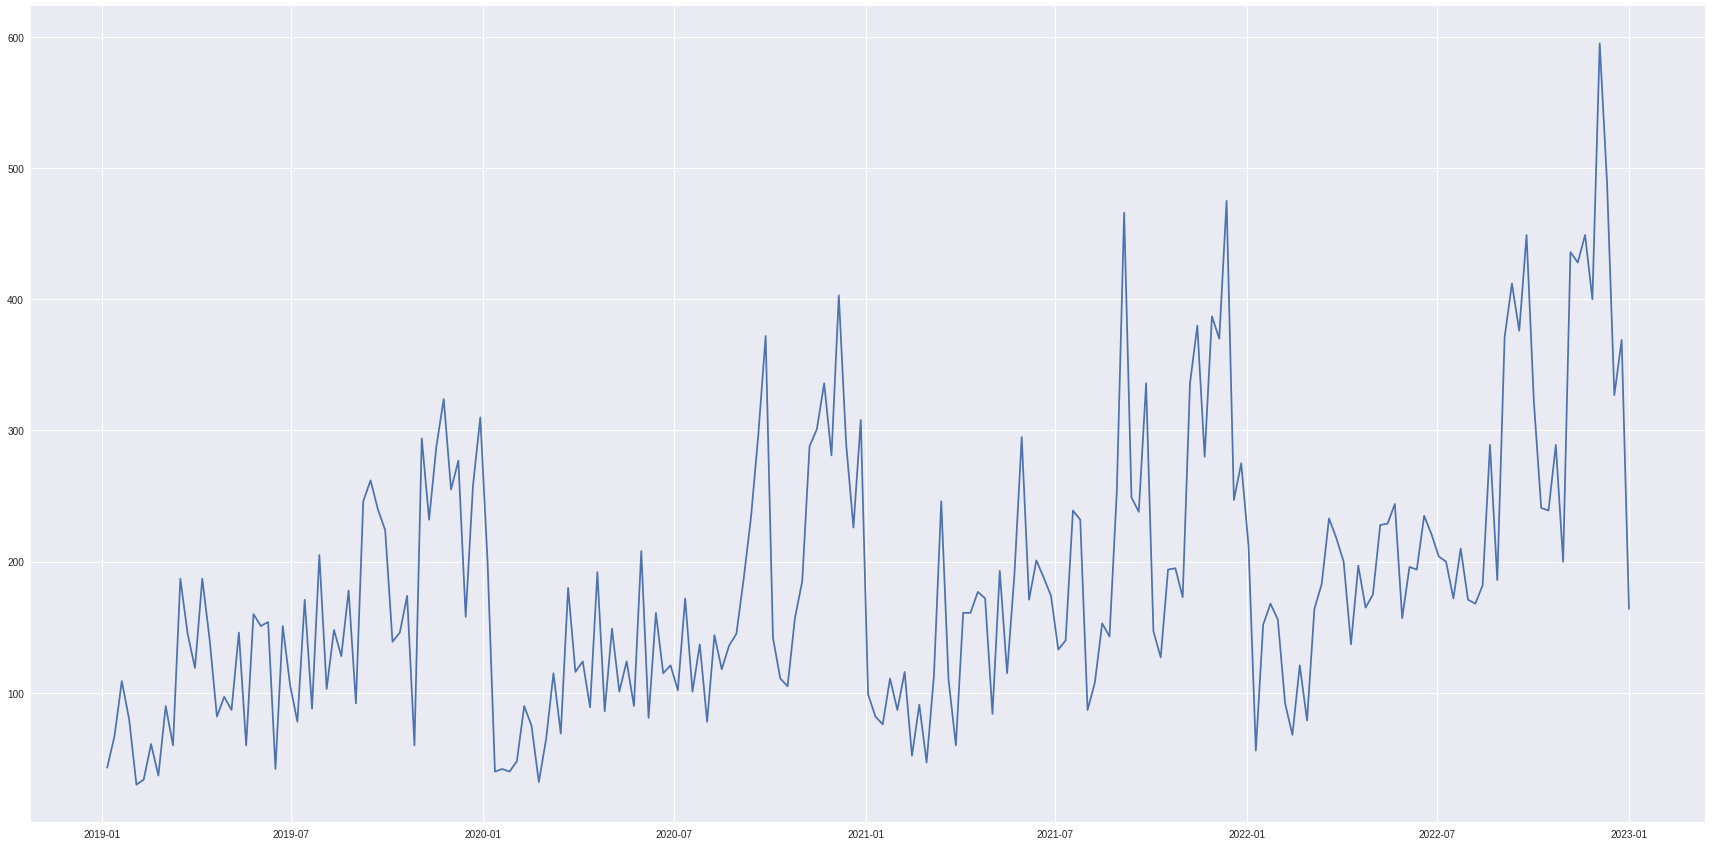

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(weekGrouped.Order_Date, weekGrouped.Quantity)

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test_sales = adfuller(list(weekGrouped.Quantity))

print("sales results:")

print("ADF = " + str(adf_test_sales[0]))

print("p-value = " +str(adf_test_sales[1]))

sales results:
ADF = -2.1690607099593975
p-value = 0.2176656045855116


On weekly quantity, the p-value, indicating a non-significant confidence that the data would be stationary

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


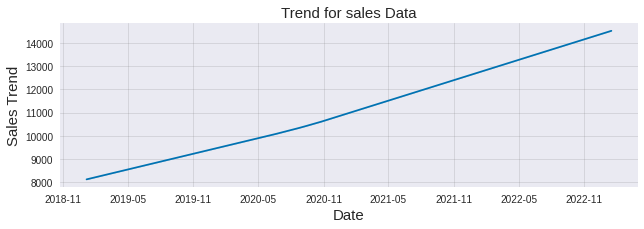

In [ ]:
from fbprophet import Prophet

m = Prophet()

weekGrouped["Order_Date"] = pd.to_datetime(weekGrouped["Order_Date"])
ds = weekGrouped.Order_Date.dt.tz_localize(None)
y = weekGrouped["Sales"]
df_for_prophet = pd.DataFrame(dict(ds=ds,y=y))
m.fit(df_for_prophet)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]
trend_ax.plot()
plt.title("Trend for sales Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sales Trend", fontsize=15)

plt.show()

# Building Models

In [ ]:
df =spark.createDataFrame(weekGrouped) 
df.show()

+-------------------+------------------+------------------+--------+----+
|         Order_Date|             Sales|            Profit|Quantity|year|
+-------------------+------------------+------------------+--------+----+
|2019-01-06 00:00:00|          4731.144|         1302.4975|      43|2019|
|2019-01-13 00:00:00|          3746.267|          638.3296|      67|2019|
|2019-01-20 00:00:00|3629.2019999999998|          309.6172|     109|2019|
|2019-01-27 00:00:00|          1876.348|          272.5509|      80|2019|
|2019-02-03 00:00:00|          1312.752|          261.4254|      30|2019|
|2019-02-10 00:00:00|           659.776|          192.5081|      34|2019|
|2019-02-17 00:00:00|2834.3019999999997|389.77070000000003|      61|2019|
|2019-02-24 00:00:00|             228.7|           31.5949|      37|2019|
|2019-03-03 00:00:00|          3770.883|-779.3442999999999|      90|2019|
|2019-03-10 00:00:00|          3379.032|          419.6104|      60|2019|
|2019-03-17 00:00:00|          9072.82

## LSTM

In [ ]:
df_week = weekGrouped

quantity = df_week['Quantity']
quantity = np.array(quantity)
quantity = quantity.reshape(209,1)

X = []
y = []
for i in range(10, 209):
    X.append(quantity[i-10:i,0])
    y.append(quantity[i,0])
X, y = np.array(X), np.array(y)
X = X.reshape(199, 10,1)

In [ ]:
X_train, y_train = X[:180], y[:180]
X_val, y_val = X[180:190], y[180:190]
X_test,y_test = X[190:],y[190:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(10, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500,verbose=1)

Epoch 1/500
6/6 [==============================] - 6s 104ms/step - loss: 32003.7051 - val_loss: 71784.5234
Epoch 2/500
6/6 [==============================] - 0s 41ms/step - loss: 22512.4336 - val_loss: 45721.6992
Epoch 3/500
6/6 [==============================] - 0s 40ms/step - loss: 11871.1016 - val_loss: 13924.1855
Epoch 4/500
6/6 [==============================] - 0s 39ms/step - loss: 7709.7139 - val_loss: 11442.7705
Epoch 5/500
6/6 [==============================] - 0s 43ms/step - loss: 7587.7144 - val_loss: 15816.0156
Epoch 6/500
6/6 [==============================] - 0s 42ms/step - loss: 6398.2744 - val_loss: 11931.4922
Epoch 7/500
6/6 [==============================] - 0s 44ms/step - loss: 5464.9424 - val_loss: 13283.3047
Epoch 8/500
6/6 [==============================] - 0s 42ms/step - loss: 6172.5693 - val_loss: 14550.2637
Epoch 9/500
6/6 [==============================] - 0s 44ms/step - loss: 5293.0347 - val_loss: 10249.6348
Epoch 10/500
6/6 [==============================] -

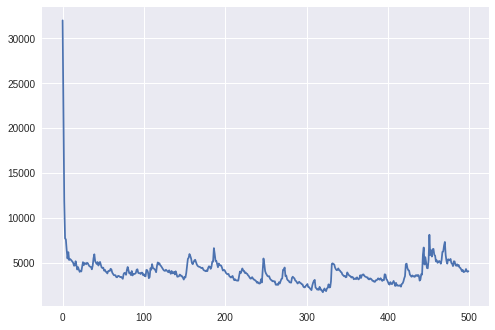

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,109.828697,187
1,122.111519,145
2,144.333237,119
3,164.968552,187
4,138.782425,141
...,...,...
175,181.961288,210
176,188.124130,171
177,157.275635,168
178,177.777191,182


In [ ]:
test_predictions = model.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
train_results

,Test Predictions,Actuals
0,207.579086,436
1,368.207642,428
2,438.128082,449
3,393.261383,400
4,406.555878,595
5,419.133423,489
6,357.661926,327
7,379.124237,369
8,336.136993,164


In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(train_results['Actuals'],train_results['Test Predictions']))
print(error)

118.78139197962223
